In [1]:
import tensorflow as tf
from tensorflow import keras

ImportError: No module named tensorflow

In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [42]:
DATADIR = r"C:\Users\niraj\Desktop\Plant-Diseases\New Plant Diseases Dataset(Augmented)\train"


In [43]:
CATEGORIES = [i for i in os.listdir(DATADIR)]

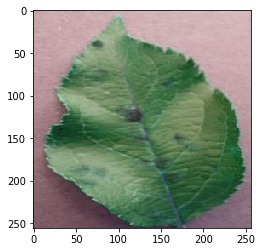

In [44]:
for category in os.listdir(DATADIR):
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break
        

In [45]:
len(img_array)

256

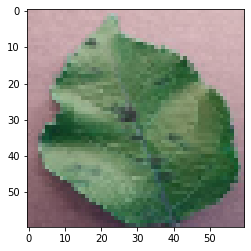

In [46]:
IMG_SIZE = 60
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [17]:
training_data = []

def create_training_data():
    for category in os.listdir(DATADIR):
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [47]:
len(training_data)

70295

In [48]:
import random
random.shuffle(training_data)

In [49]:
X = []
y = []

In [23]:
for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)


In [50]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

### To Load Back Data
<code> 
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)
<code>

In [51]:
from tensorflow.keras.layers import Dense, Droupout, Activation, Flatten, Conv2D, MaxPooling2D

X = X/255.0

model = tf.keras.Sequential()
model.add(Conv2D(64), (3,3), input_shape = X.shape[1:])
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64), (3,3))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64), (3,3))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="categorical", optimizer="adam", metrics = ["accuracy"])
model.fit(X,y,batch_size=100, validation_split=0.1)


ImportError: Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\ProgramData\Anaconda3\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\ProgramData\Anaconda3\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.